In [1]:
import seaborn as sns
import numpy as np
# import tensorflow as tf
# import spacy
import pandas as pd
import matplotlib.pyplot as plt
# nlp = spacy.load('en_core_web_sm')


data = pd.read_csv('/content/drive/MyDrive/Datasets/housing.csv').dropna()

data = data.join(pd.get_dummies(data['ocean_proximity'])).drop(columns=['ocean_proximity'])

data = data.drop(columns=['ISLAND'])    # very low correlation value


In [2]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


### FEATURE ENGINEERING and FEATURE TRANSFORMATION

In [3]:
# Data Visualization using

# 1. pairplot for numericals
# 2. boxplot & countplot forcategorical variables
# 3. Confusion matrix
# (and conclusionsfor each)

**Once you’ve got yourself a nice cleaned dataset, the next step is Exploratory Data Analysis (EDA). EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis.**

 Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000
<1H OCEAN,20433.0,0.442128,0.496652,0.0000,0.0000,0.0000,1.000,1.0000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

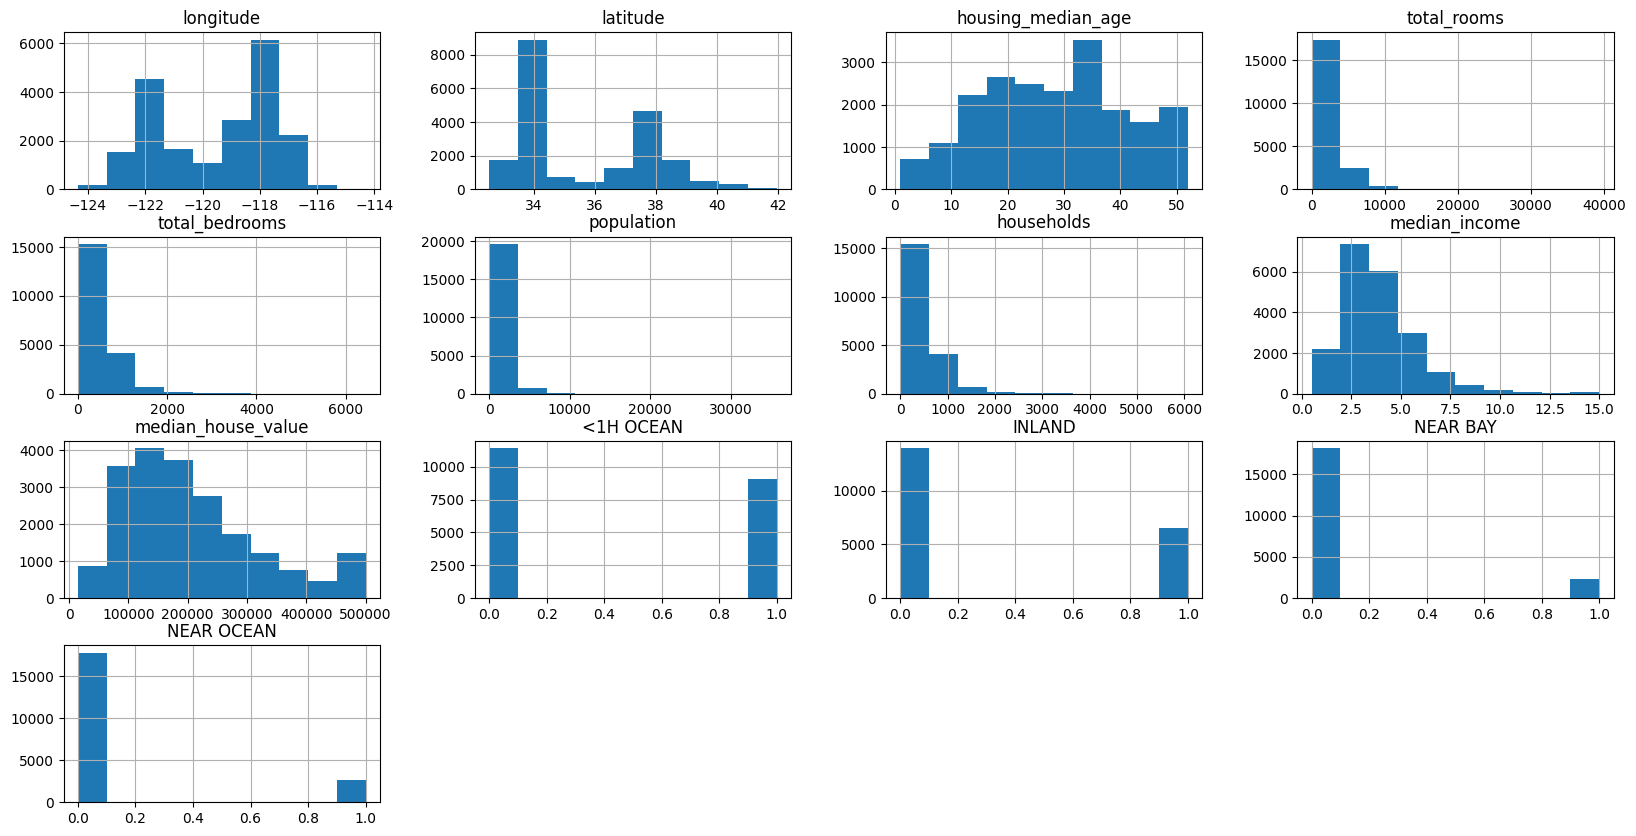

In [5]:
# plt.figure(figsize=(15,8))

data.hist(figsize=(20, 10))

In [6]:
# sns.pairplot(data, diag_kind='kde')   # kernel density estimate

In [7]:
# sns.pairplot(data, hue='total_bedrooms', diag_kind='kde', size=4,
#             plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

<Axes: >

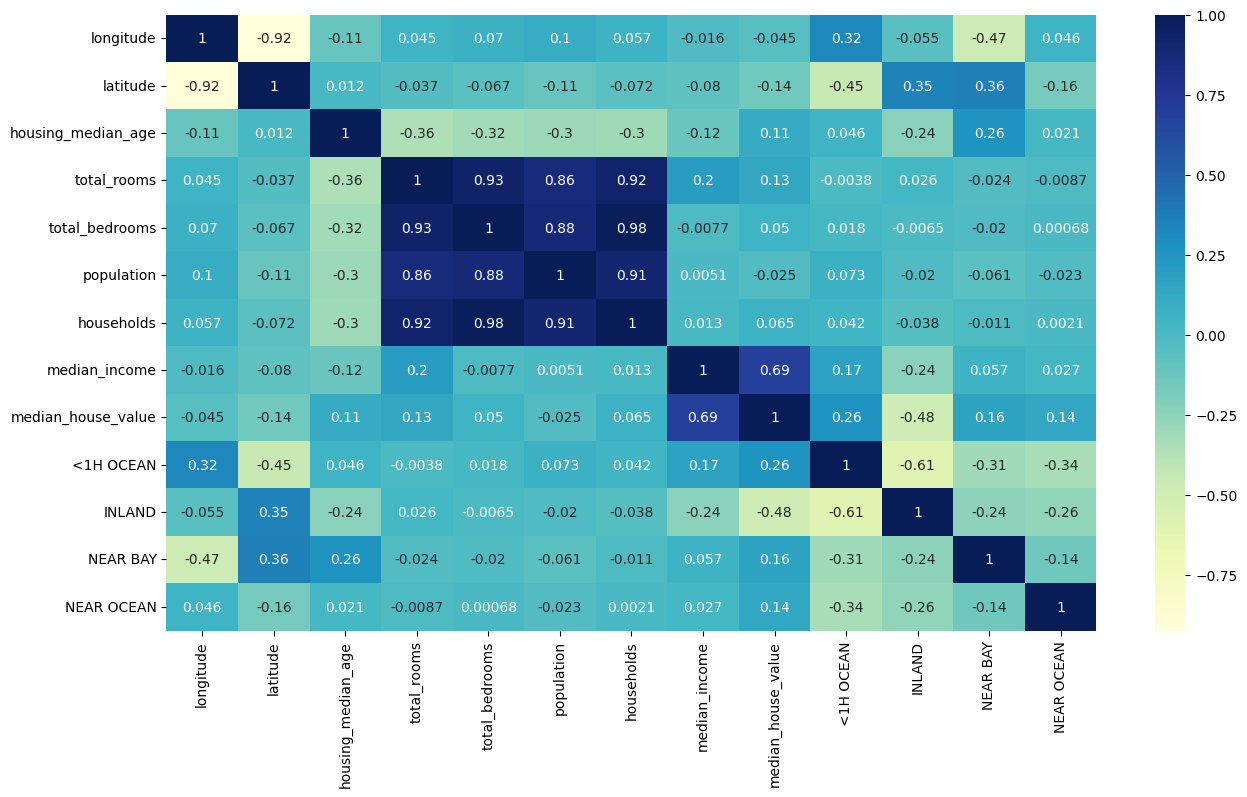

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

# Latitude is negatively correlated with median-house-value

In [9]:
# Transforming Skewed data

# 1. Total rooms, total bedrooms, population and households are having Skewdness (right skewed)
# make them gaussian

def log_feature(data, feature):
  data["log_"+feature] = np.log(data[feature]+1)
  return data

data = log_feature(data, 'total_rooms')
data = log_feature(data, 'total_bedrooms')
data = log_feature(data, 'population')
data = log_feature(data, 'households')

#data.hist(figsize=(25,10))

<Axes: xlabel='latitude', ylabel='longitude'>

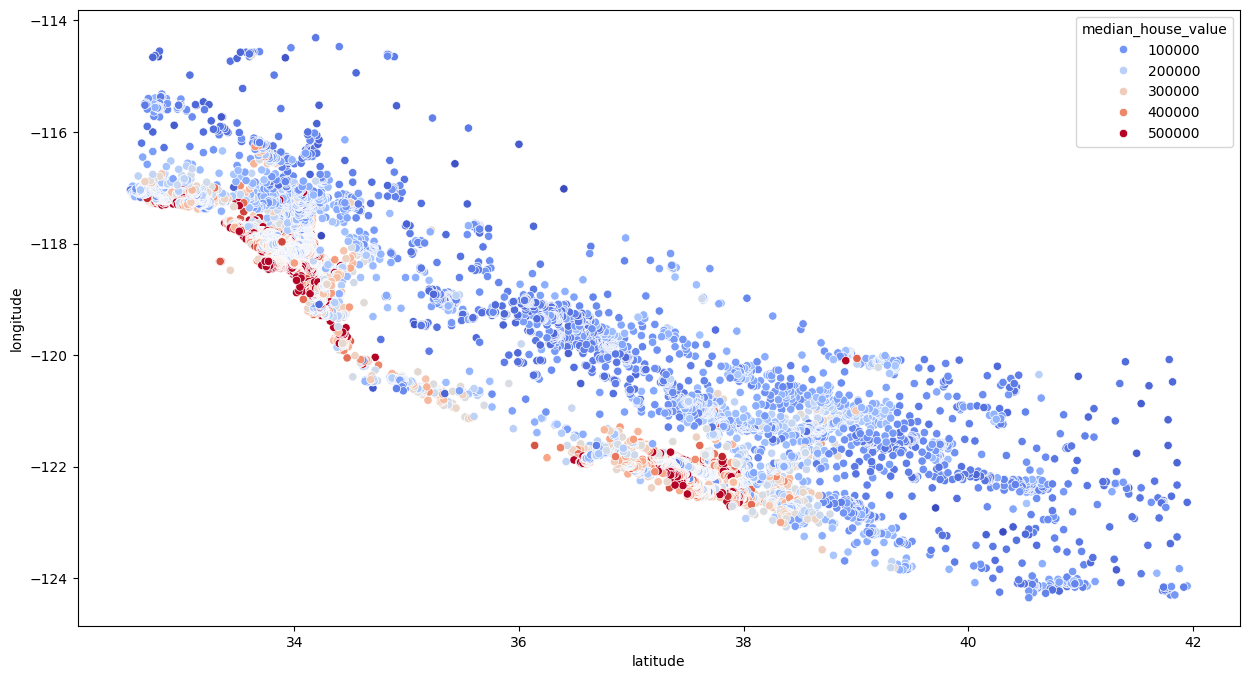

In [10]:
# Feature correlation

plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue="median_house_value", palette='coolwarm')

# it resembles the actual map since it is latitude and longitude, places towards the coast are more Expensive

In [11]:
# Feature Engineering

data["bedroom_ratio"] = data['total_bedrooms'] / data["total_rooms"]
data["rooms_per_household"] = data['total_rooms'] / data["households"]

In [12]:
data["rooms_per_household"].dropna()

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20433, dtype: float64

<Axes: >

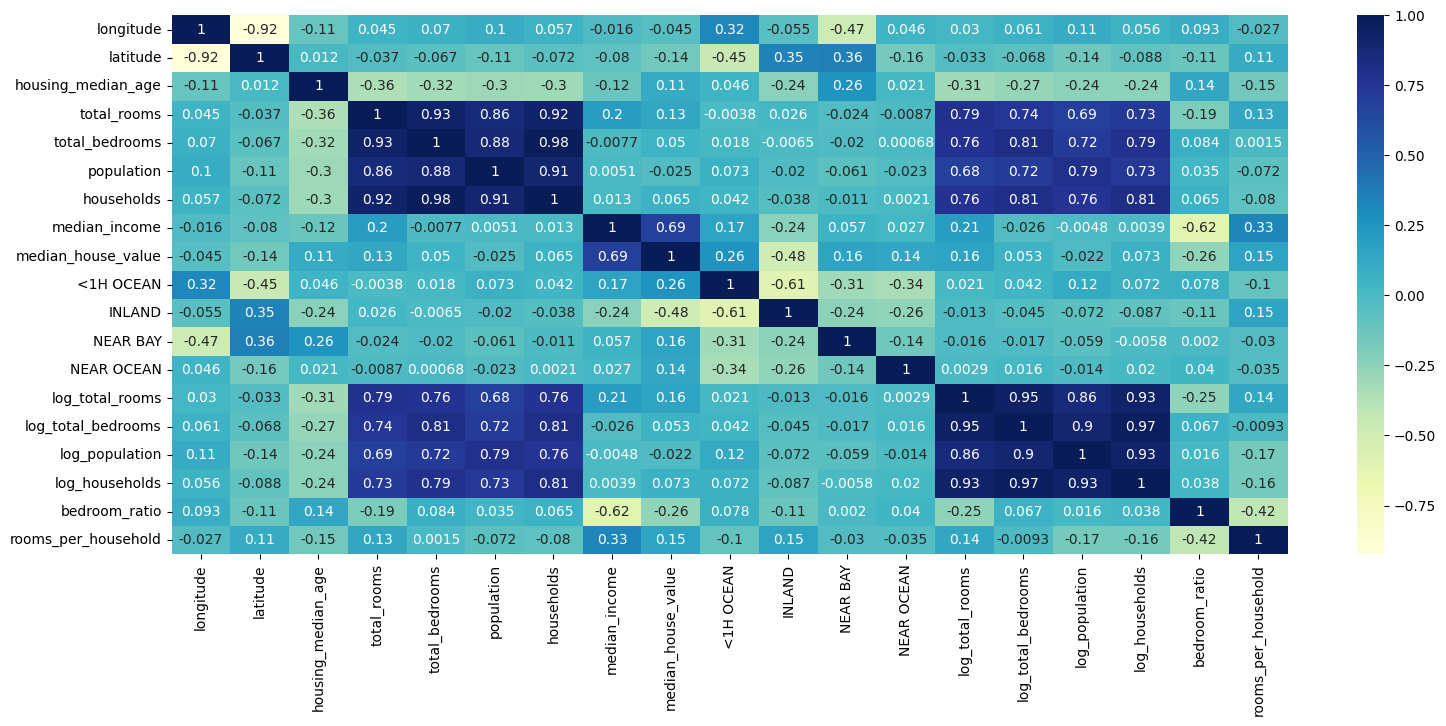

In [13]:
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20433.0,35.633221,2.136348,32.540000,33.930000,34.260000,37.720000,41.950000
housing_median_age,20433.0,28.633094,12.591805,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20433.0,2636.504233,2185.269567,2.000000,1450.000000,2127.000000,3143.000000,39320.000000
total_bedrooms,20433.0,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20433.0,1424.946949,1133.208490,3.000000,787.000000,1166.000000,1722.000000,35682.000000
households,20433.0,499.433465,382.299226,1.000000,280.000000,409.000000,604.000000,6082.000000
median_income,20433.0,3.871162,1.899291,0.499900,2.563700,3.536500,4.744000,15.000100
median_house_value,20433.0,206864.413155,115435.667099,14999.000000,119500.000000,179700.000000,264700.000000,500001.000000
<1H OCEAN,20433.0,0.442128,0.496652,0.000000,0.000000,0.000000,1.000000,1.000000


### Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y = data.drop(columns=['median_house_value']), data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test

array([[0.30278884, 0.5696068 , 0.7254902 , ..., 0.37037097, 0.10521141,
        0.03616269],
       [0.60956175, 0.16684378, 0.58823529, ..., 0.56911319, 0.09674611,
        0.03189637],
       [0.25498008, 0.50797024, 0.09803922, ..., 0.70738756, 0.10760234,
        0.02877568],
       ...,
       [0.28386454, 0.77470776, 0.2745098 , ..., 0.63851816, 0.12798875,
        0.03424353],
       [0.30876494, 0.65143464, 0.25490196, ..., 0.76742851, 0.07554833,
        0.04037035],
       [0.59462151, 0.16259299, 0.29411765, ..., 0.79864635, 0.20763514,
        0.02222873]])

<Axes: >

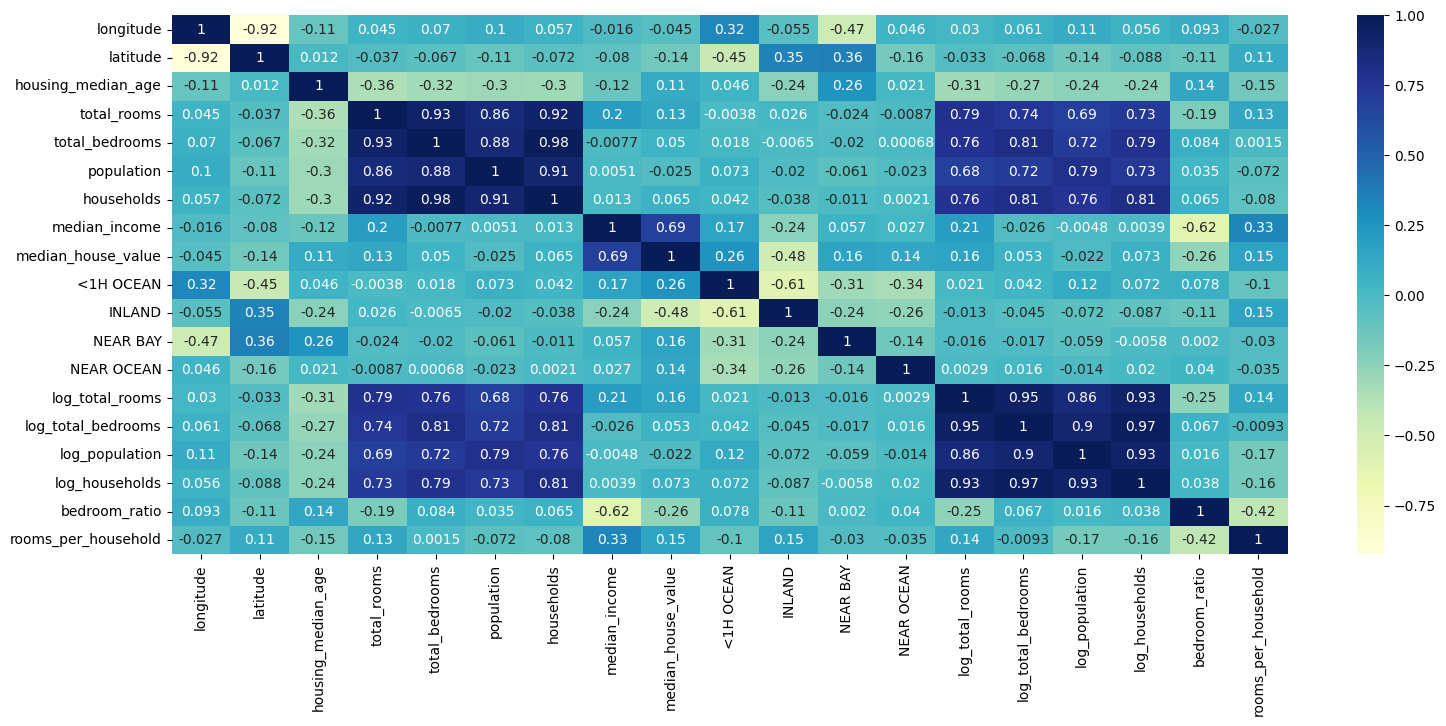

In [16]:
plt.figure(figsize=(18, 7))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [17]:
# DEMO CELL

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
score = classifier.score(X_test, y_test)

print("Accuracy:", score)  # 0.04, 0.048,

Accuracy: 0.0474559686888454


In [19]:
X_train[0], y_train[0]

(array([0.18924303, 0.55366631, 0.68627451, 0.05852281, 0.05896958,
        0.02402108, 0.06084526, 0.38120164, 0.        , 0.        ,
        1.        , 0.        , 0.70075505, 0.65018932, 0.57172291,
        0.65158074, 0.0727071 , 0.0380071 ]),
 452600.0)

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
forest.score(X_train, y_train), forest.score(X_test, y_test)

(0.9756852882799759, 0.8121233788391626)

### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

0.8134395922400418